# Announcement-on-ML
<a href='http://www.kgptalkie.com' target="_blank"> <img src='https://github.com/laxmimerit/Important-Announcement-on-ML/raw/master/kgptalkie_strips.png'/></a>

# ML Resources
|  ML Course | Description |
|:---|:---|
| [**Master LangGraph with Ollama - Agentic Chatbot and RAG**](https://www.udemy.com/course/langgraph-with-ollama/?referralCode=B646DCB44A189BEBC20C) | Master LangGraph, Ollama, and Agentic RAG. Ollama, LLAMA, LLAMA 3.2, FAISS, RAG, Deploy RAG, Gen AI, LLM|
| [**Master Langchain and Ollama - Chatbot, RAG and Agents**](https://www.udemy.com/course/ollama-and-langchain/?referralCode=7F4C0C7B8CF223BA9327) | Master Langchain v0.3, Private Chatbot, Deploy LLM App.  Ollama, LLAMA, LLAMA 3.2, FAISS, RAG, Deploy RAG, Gen AI, LLM|
| [**Fine Tuning LLM with HuggingFace Transformers for NLP**](https://www.udemy.com/course/fine-tuning-llm-with-hugging-face-transformers/?referralCode=6DEB3BE17C2644422D8E) | Learn how to fine tune LLM with custom dataset. You will learn basics of transformers then fine tune LLM|
| [**Data Visualization in Python Masterclass™: Beginners to Pro**](https://bit.ly/udemy95off_kgptalkie) |  Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Python for Machine Learning: A Step-by-Step Guide**](https://bit.ly/ml-ds-project) | Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Deep Learning for Beginners with Python**](https://bit.ly/dl-with-python) | Neural Networks, TensorFlow, ANN, CNN, RNN, LSTM, Transfer Learning and Much More. |
| [**Python for Linear Regression in Machine Learning**](https://bit.ly/regression-python) | Learn to build Linear Regression models using Python and its libraries like Scikit-Learn. |
| [**Introduction to Spacy 3 for Natural Language Processing**](https://bit.ly/spacy-intro) | Learn to build Natural Language Processing models using Python and its libraries like Spacy. |
| [**Advanced Machine Learning and Deep Learning Projects**](https://bit.ly/kgptalkie_ml_projects) | Learn to build Advanced Machine Learning and Deep Learning models using Python and transformer models like BERT, GPT-2, and XLNet. |
| [**Natural Language Processing in Python for Beginners**](https://bit.ly/intro_nlp) | Learn to build Natural Language Processing Projects using Spacy, NLTK, and Gensim, and transformer models like BERT, GPT-2, and XLNet. |
| [**Deployment of Machine Learning Models in Production in Python**](https://bit.ly/bert_nlp) |  Learn to deploy Machine Learning and Deep Learning models using Python and its libraries like Flask, Streamlit, and NGINX. |
| [**R 4.0 Programming for Data Science - Beginners to Pro**](https://bit.ly/r4-ml) | Learn to build Machine Learning and Deep Learning models using R and its libraries like caret, tidyverse, and keras. |


## Chatbot with LangGraph - Baby Step Toward Agents

In [1]:
from dotenv import load_dotenv
import os

load_dotenv('../.env')

True

In [2]:
from typing import Annotated, TypedDict 
from langgraph.graph import  StateGraph, START, END

from langgraph.graph.message import add_messages 

from langchain_ollama import ChatOllama
from IPython.display import display, Image

llm = ChatOllama(model="llama3.2:3b", base_url = "http://localhost:11434")

llm.invoke("Hi")

AIMessage(content='How can I assist you today?', additional_kwargs={}, response_metadata={'model': 'llama3.2:3b', 'created_at': '2024-11-25T16:14:28.6520442Z', 'done': True, 'done_reason': 'stop', 'total_duration': 2085597200, 'load_duration': 1771953700, 'prompt_eval_count': 26, 'prompt_eval_duration': 77575000, 'eval_count': 8, 'eval_duration': 233223000, 'message': Message(role='assistant', content='', images=None, tool_calls=None)}, id='run-ebdad0ca-d1fd-4db5-b574-a74c5c783cc3-0', usage_metadata={'input_tokens': 26, 'output_tokens': 8, 'total_tokens': 34})

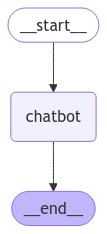

In [37]:
class State(TypedDict):
    # {"messages": ["your message"]}
    messages: Annotated[list, add_messages]


def chatbot(state: State):
    response = llm.invoke(state["messages"])
    return {"messages": [response]}


graph_builder = StateGraph(State)
graph_builder.add_node("chatbot", chatbot)

graph_builder.add_edge(START, "chatbot")

graph_builder.add_edge("chatbot", END)

graph = graph_builder.compile()


display(Image(graph.get_graph().draw_mermaid_png()))

In [38]:
graph.invoke({"messages": ["Hi", "myself is laxmi kant"]})

{'messages': [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}, id='f3bd60ba-4db7-4963-9e80-5831ef83fdbd'),
  HumanMessage(content='myself is laxmi kant', additional_kwargs={}, response_metadata={}, id='e79f4f8b-7e55-4adc-9374-1b5ce87031a8'),
  AIMessage(content="Namaste Laxmi Kant! It's lovely to meet you. Is there anything I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'model': 'llama3.2:3b', 'created_at': '2024-11-25T14:39:39.7364179Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 1395897500, 'load_duration': 28059900, 'prompt_eval_count': 34, 'prompt_eval_duration': 51746000, 'eval_count': 30, 'eval_duration': 1311565000}, id='run-adde00a9-d0a0-4cce-9164-ae59fe8223e8-0', usage_metadata={'input_tokens': 34, 'output_tokens': 30, 'total_tokens': 64})]}

### Enhancing the Chatbot with Tools and Memory- Making it More Like an Agent

https://github.com/laxmimerit/Langchain-and-Ollama

In [40]:
from langchain_community.tools.tavily_search import TavilySearchResults
from langgraph.prebuilt import ToolNode, tools_condition

from langchain_core.messages import HumanMessage
from langchain_core.tools import tool


llm = ChatOllama(model="llama3.2:3b", base_url = "http://localhost:11434")

In [57]:
@tool
def internet_search(query: str):
    """
    Search the web for realtime and latest information.
    for examples, news, stock market, weather updates etc.
    
    Args:
    query: The search query
    """
    search = TavilySearchResults(
        max_results=3,
        search_depth='advanced',
        include_answer=True,
        include_raw_content=True,
    )

    response = search.invoke(query)

    return response

@tool
def llm_search(query: str):
    """
    Use the LLM model for general and basic information.
    """
    response = llm.invoke(query)
    return response

In [58]:
tools = [internet_search, llm_search]
tools

[StructuredTool(name='internet_search', description='Search the web for realtime and latest information.\nfor examples, news, stock market, weather updates etc.\n\nArgs:\nquery: The search query', args_schema=<class 'langchain_core.utils.pydantic.internet_search'>, func=<function internet_search at 0x000001C7A1FB05E0>),
 StructuredTool(name='llm_search', description='Use the LLM model for general and basic information.', args_schema=<class 'langchain_core.utils.pydantic.llm_search'>, func=<function llm_search at 0x000001C7A1FB0860>)]

In [59]:
llm_with_tools = llm.bind_tools(tools)
llm_with_tools

RunnableBinding(bound=ChatOllama(model='llama3.2:3b', base_url='http://localhost:11434'), kwargs={'tools': [{'type': 'function', 'function': {'name': 'internet_search', 'description': 'Search the web for realtime and latest information.\nfor examples, news, stock market, weather updates etc.\n\nArgs:\nquery: The search query', 'parameters': {'properties': {'query': {'type': 'string'}}, 'required': ['query'], 'type': 'object'}}}, {'type': 'function', 'function': {'name': 'llm_search', 'description': 'Use the LLM model for general and basic information.', 'parameters': {'properties': {'query': {'type': 'string'}}, 'required': ['query'], 'type': 'object'}}}]}, config={}, config_factories=[])

In [60]:
class State(TypedDict):
    # {"messages": ["your message"]}
    messages: Annotated[list, add_messages]


def chatbot(state: State):
    response = llm_with_tools.invoke(state["messages"])
    return {"messages": [response]}

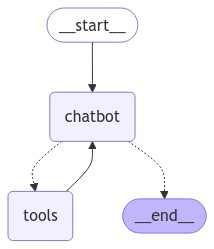

In [63]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

graph_builder = StateGraph(State)

graph_builder.add_node("chatbot", chatbot)
tool_node = ToolNode(tools=tools)
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges("chatbot", tools_condition)

graph_builder.add_edge("tools", "chatbot")
graph_builder.set_entry_point("chatbot")

graph = graph_builder.compile(checkpointer=memory)

display(Image(graph.get_graph().draw_mermaid_png()))

In [65]:
# graph.invoke({"messages": ["Tell me about the earth in 3 points"]})

config = {"configurable": {"thread_id": 1}}
output = graph.invoke({"messages": ["Tell me about the earth in 3 points"]}, config=config)
output

{'messages': [HumanMessage(content='Tell me about the earth in 3 points', additional_kwargs={}, response_metadata={}, id='ed205897-dded-4e03-ae02-ec4f15e1cad5'),
  AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'llama3.2:3b', 'created_at': '2024-11-25T15:30:34.3014458Z', 'message': {'role': 'assistant', 'content': '', 'tool_calls': [{'function': {'name': 'internet_search', 'arguments': {'query': 'information about earth'}}}]}, 'done_reason': 'stop', 'done': True, 'total_duration': 4629248100, 'load_duration': 2279814900, 'prompt_eval_count': 236, 'prompt_eval_duration': 425404000, 'eval_count': 27, 'eval_duration': 1920989000}, id='run-74519c27-d036-4c2c-b2d8-37f13f508673-0', tool_calls=[{'name': 'internet_search', 'args': {'query': 'information about earth'}, 'id': 'bee89fe5-9611-455c-bd71-59ed534b5d80', 'type': 'tool_call'}], usage_metadata={'input_tokens': 236, 'output_tokens': 27, 'total_tokens': 263}),
  ToolMessage(content='[{"url": "https://thefactfile.o

In [67]:
config = {"configurable": {"thread_id": 1}}

while True:
    user_input = input()
    if user_input in ["exit", "quit", "q"]:
        print("Exiting...")
        break

    output = graph.invoke({"messages": [user_input]}, config=config)
    # output['messages'][-1].pretty_print()
    print(output)
    

{'messages': [HumanMessage(content='Tell me about the earth in 3 points', additional_kwargs={}, response_metadata={}, id='ed205897-dded-4e03-ae02-ec4f15e1cad5'), AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'llama3.2:3b', 'created_at': '2024-11-25T15:30:34.3014458Z', 'message': {'role': 'assistant', 'content': '', 'tool_calls': [{'function': {'name': 'internet_search', 'arguments': {'query': 'information about earth'}}}]}, 'done_reason': 'stop', 'done': True, 'total_duration': 4629248100, 'load_duration': 2279814900, 'prompt_eval_count': 236, 'prompt_eval_duration': 425404000, 'eval_count': 27, 'eval_duration': 1920989000}, id='run-74519c27-d036-4c2c-b2d8-37f13f508673-0', tool_calls=[{'name': 'internet_search', 'args': {'query': 'information about earth'}, 'id': 'bee89fe5-9611-455c-bd71-59ed534b5d80', 'type': 'tool_call'}], usage_metadata={'input_tokens': 236, 'output_tokens': 27, 'total_tokens': 263}), ToolMessage(content='[{"url": "https://thefactfile.org/e